Dates confinement et déconfinemenet : (source: https://en.wikipedia.org/wiki/National_responses_to_the_COVID-19_pandemic#France)

    PAYS	           DATE CONFINEMENT	   DATE DECONFINEMENT
Afrique du Sud  	      2020-03-26	      2020-04-30
Allemagne   	          2020-03-23	      2020-04-20  to  2020-05-10
Australie   	          2020-03-23	
Brésil : Santa Catarina	  2020-03-17		  2020-04-07
Brésil : São Paulo	      2020-03-24	      2020-05-10
Canada : Québec 		  2020-03-13          2020-06-25
Corée du Sud  			
Espagne 	              2020-03-14	      2020-05-09
France              	  2020-03-17	      2020-05-11
Inde                	  2020-03-25	      2020-06-30
International		
Italie              	  2020-03-09	      2020-05-18
Japon               	No proper lockdown	
Nouvelle-Zélande    	  2020-03-26	      2020-05-14
Pays-Bas            	Never imposed lockdown	
Pologne                   2020-03-13	      2020-04-11
Royaume-Uni         	  2020-03-23	
Suède                   Never imposed lockdown	
USA : California	      2020-03-19	
EU	

In [1]:
import pandas as pd
from pandas import Grouper
from matplotlib import pyplot
from functools import reduce
import re

pd.options.display.max_colwidth = 1000 # afficher max 1000 caractères
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))

## Manipulate all collected tweets

In [3]:
tweets = pd.read_pickle('../tweets_clean_translated_vader_reduced_merged_clean.pickle')
tweets.head(2)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
0,1255325711960768514,@realDonaldTrump,Wed Apr 29 02:39:07 +0000 2020,2020-04-29,en,,THANK YOU MICHAEL! @bittyandbeaus https://t.co/KVXVcdO79E,eng_or_undef,THANK YOU MICHAEL!,0.4199,False,11808,False,NaN,NaN,None,False,50990,False,[2020-04-29 14:21:12],USA,gouvernement_decideurs,person,autres,"[thank, michael]",17
1,1255283103691661313,@realDonaldTrump,Tue Apr 28 23:49:48 +0000 2020,2020-04-28,en,,"RT @GLFOP: Thank you, President @realDonaldTrump, for your steadfast, unapologetic support of law enforcement during #COVID19. From DAY ONE…",eng_or_undef,"Thank you, President , for your steadfast, unapologetic support of law enforcement during covid 19. From DAY ONE…",0.7351,False,5786,False,NaN,NaN,None,False,0,NaN,[2020-04-29 14:21:12],USA,gouvernement_decideurs,person,autres,"[thank, president, steadfast, unapologetic, support, law, enforcement, covid, 1st]",17


In [4]:
tweets.shape

(398672, 26)

In [5]:
tweets[tweets.country=="Royaume-Uni"].type.unique()

array(['gouvernement_decideurs', 'administration_publique', 'expert',
       'academic_institutions', 'politicien'], dtype=object)

In [6]:
tweets_day = tweets.groupby('date_iso')[['id']].count()
tweets_day.columns=['total']
tweets_day.head(2)

,total
date_iso,
2019-11-16,757
2019-11-17,811


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

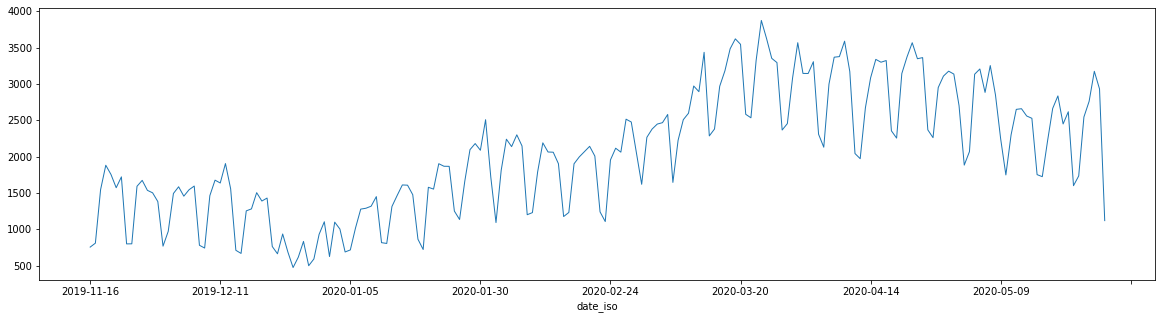

In [7]:
tweets_day['total'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

<AxesSubplot:xlabel='week_nb'>

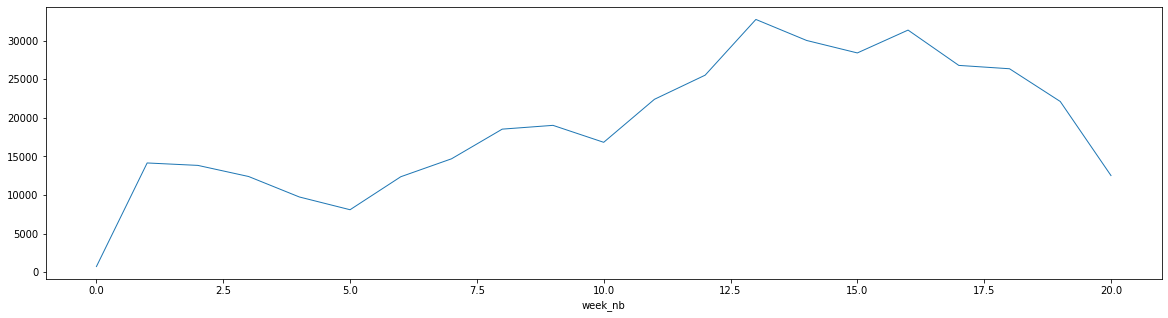

In [8]:
tweets_week = tweets.groupby('week_nb')[['id']].count()
tweets_week.columns=['total']
tweets_week['total'].plot.line(x='week_nb', y='total', figsize=(20,5), lw=1)

## Manipulating only tweets containing "covid" 

In [9]:
tweets_corona = tweets[tweets['full_text_translated'].str.contains(r'(corona(virus)?|covid|SARS-?CoV-?2|2019-?nCoV)([-_\s]?19)?', flags=re.IGNORECASE)]
print(len(tweets_corona))
print("(Pourcentage :", round((len(tweets_corona)/len(tweets))*100),"%)")
#flags=re.IGNORECASE is important to not miss any due to case sensitivity

/anaconda3/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


94693
(Pourcentage : 24 %)


In [10]:
tweets_corona_day = tweets_corona.groupby('date_iso')[['id']].count()
tweets_corona_day.columns=['total']
tweets_corona_day.head(2)

,total
date_iso,
2019-12-10,1
2019-12-13,1


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

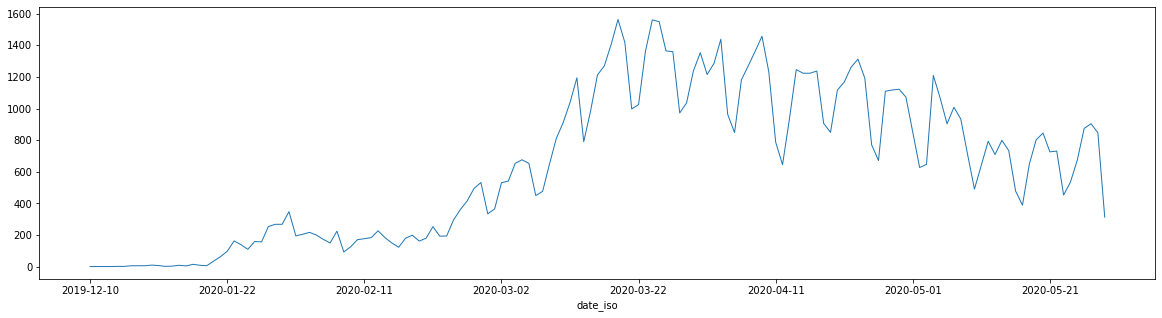

In [11]:
tweets_corona_day['total'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

<AxesSubplot:xlabel='week_nb'>

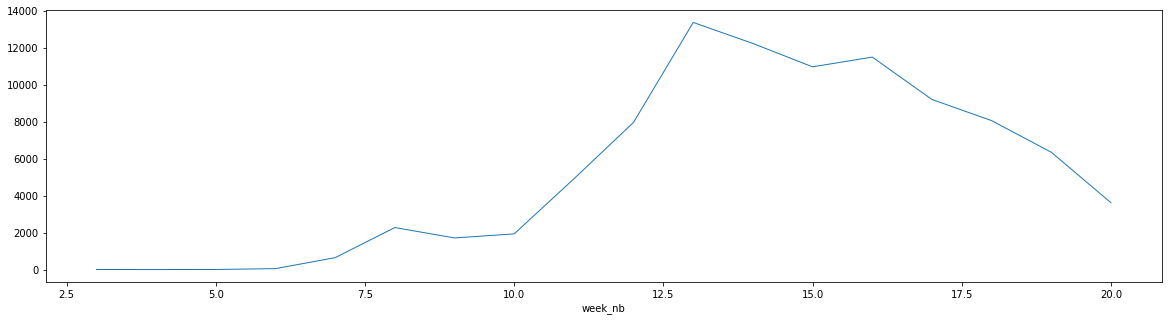

In [12]:
tweets_corona_week = tweets_corona.groupby('week_nb')[['id']].count()
tweets_corona_week.columns=['total']
tweets_corona_week['total'].plot.line(x='week_nb', y='total', figsize=(20,5), lw=1)

## Visualizing all tweets PER COUNTRY

### INDIA case

In [13]:
tweets_India = tweets[tweets.country == "Inde"]
tweets_corona_India = tweets_corona[tweets_corona.country == "Inde"]
tweets_India.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
94109,1255426131647516676,@rashtrapatibhvn,Wed Apr 29 09:18:09 +0000 2020,2020-04-29,hi,hi,"विख्यात अभिनेता इरफान खान के असामयिक निधन से गहरा दुःख हुआ। वे दुर्लभ प्रतिभा-सम्पन्न कलाकार थे। उनकी विविध भूमिकाओं की छाप सदैव हमारे दिलों में अंकित रहेगी । उनका निधन, सिने-जगत व अनगिनत प्रशंसको के लिए अपूरणीय क्षति है। उनके परिवार और प्रियजनों के प्रति मेरी शोक संवेदनाएं।",done,The untimely demise of noted actor Irrfan Khan was deeply saddened. He was a rare talent-rich artist. The imprint of his diverse roles will always be etched in our hearts. His death is an irreparable loss to the cine world and countless fans. My condolences to his family and loved ones.,-0.1761,False,1496,False,NaN,NaN,None,False,14616,NaN,[2020-04-29 16:22:10],Inde,gouvernement_decideurs,person,autres,"[untimely, demise, note, actor, iran, khan, deeply, sadden, rare, talent, rich, artist, imprint, diverse, role, etch, heart, death, irreparable, loss, cine, world, countless, fan, condolence, family, love, one]",17


In [14]:
print("Total India tweets : " , len(tweets_India))
print("Total India tweets about corona : " , len(tweets_corona_India))
print("Percentage tweets about corona: " , len(tweets_corona_India)/len(tweets_India))

Total India tweets :  40012
Total India tweets about corona :  12193
Percentage tweets about corona:  0.3047335799260222


In [15]:
tweets_India_day = tweets_India.groupby('date_iso')[['id']].count()
tweets_India_day.columns=['total_india']
tweets_India_day.head(2)

,total_india
date_iso,
2019-11-16,42
2019-11-17,91


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

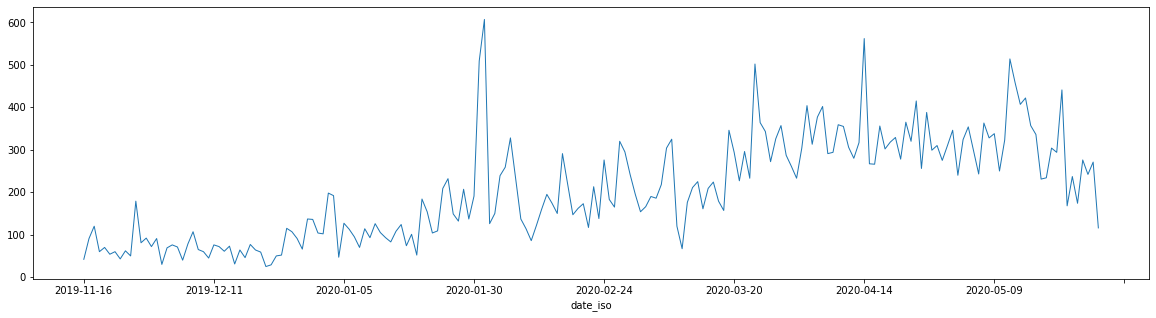

In [16]:
tweets_India_day['total_india'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

### USA CASE

In [17]:
tweets_usa = tweets[tweets.country == "USA"]
tweets_corona_usa = tweets_corona[tweets_corona.country == "USA"]
tweets_usa.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
0,1255325711960768514,@realDonaldTrump,Wed Apr 29 02:39:07 +0000 2020,2020-04-29,en,,THANK YOU MICHAEL! @bittyandbeaus https://t.co/KVXVcdO79E,eng_or_undef,THANK YOU MICHAEL!,0.4199,False,11808,False,NaN,NaN,None,False,50990,False,[2020-04-29 14:21:12],USA,gouvernement_decideurs,person,autres,"[thank, michael]",17


In [18]:
print("Total USA tweets : " , len(tweets_usa))
print("Total USA tweets about corona : " , len(tweets_corona_usa))
print("Percentage tweets about corona: " , len(tweets_corona_usa)/len(tweets_usa))

Total USA tweets :  38922
Total USA tweets about corona :  9477
Percentage tweets about corona:  0.24348697394789579


In [19]:
tweets_usa_day = tweets_usa.groupby('date_iso')[['id']].count()
tweets_usa_day.columns=['total_usa']
tweets_usa_day.head(2)

,total_usa
date_iso,
2019-11-16,108
2019-11-17,115


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

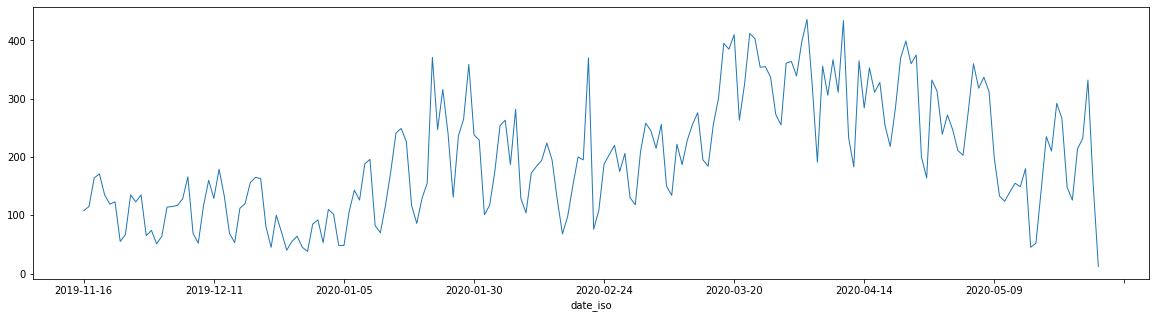

In [20]:
tweets_usa_day['total_usa'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

### GERMANY case

In [21]:
tweets_Allemagne= tweets[tweets.country == "Allemagne"]
tweets_corona_Allemagne = tweets_corona[tweets_corona.country == "Allemagne"]
tweets_corona_Allemagne.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
43761,1255482328773799937,@BMG_Bund,Wed Apr 29 13:01:27 +0000 2020,2020-04-29,de,de,"Das Tragen der Alltagsmaske kann dabei helfen, die Ausbreitung des Coronavirus zu begrenzen. Hierbei kommt es jedoch auf den richtigen Umgang mit der Alltagsmaske an. Folgende Hinweise sollten beim Absetzen beachtet werden. https://t.co/4srVi6GcD2",done,"Wearing the everyday mask can help limit the spread of the coronavirus. However, this depends on the correct handling of the everyday mask. The following instructions should be observed when weaning.",0.4019,False,21,False,NaN,NaN,None,False,24,False,[2020-04-29 15:23:55],Allemagne,gouvernement_decideurs,institution,autres,"[wear, everyday, mask, help, limit, spread, coronavirus, depend, correct, handling, everyday, mask, follow, instruction, observe, wean]",17


In [22]:
print("Total Germany tweets : " , len(tweets_Allemagne))
print("Total Germany tweets about corona : " , len(tweets_corona_Allemagne))
print("Percentage tweets about corona: " , len(tweets_corona_Allemagne)/len(tweets_Allemagne))

Total Germany tweets :  34111
Total Germany tweets about corona :  4696
Percentage tweets about corona:  0.13766820087361847


In [23]:
tweets_Allemagne_day = tweets_Allemagne.groupby('date_iso')[['id']].count()
tweets_Allemagne_day.columns=['total_germany']
tweets_Allemagne_day.head(2)

,total_germany
date_iso,
2019-11-16,139
2019-11-17,55


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

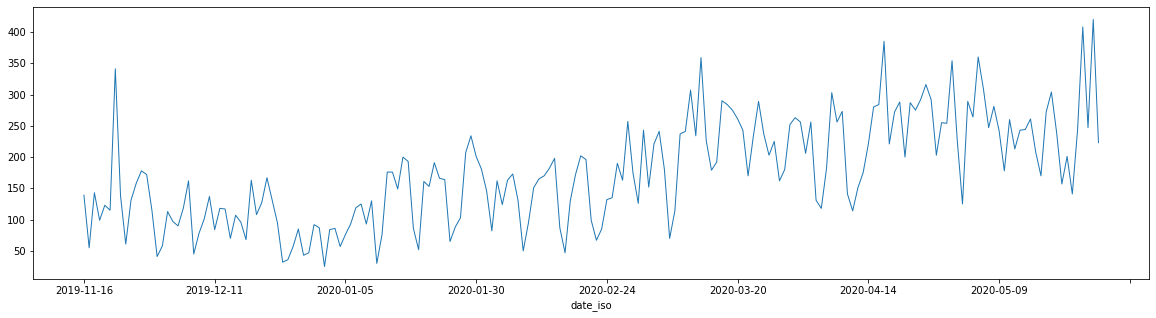

In [24]:
tweets_Allemagne_day['total_germany'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

2020-03-11 :  ---> 1er pic de la courbe
Le 11 mars, la chancelière Merkel s'exprime enfin pour la première fois devant la presse au sujet de cette épidémie. Elle explique que « mettre fin à sa propagation passait « en premier », avant le respect des règles budgétaires. » Elle ajoute que « 60 % à 70 % de la population allemande pourrait être infectée en Allemagne. »

2020-03-13 :  ---> 2ème pic de la courbe
Le 13 mars, la décision de fermer tous les établissements scolaires et universités.

2020-04-01 :  ---> 3ème pic de la courbe
L’Allemagne prolonge ses mesures de restriction au moins jusqu’au 19 avril

### FRANCE case

In [25]:
tweets_France = tweets[tweets.country == "France"]
tweets_corona_France = tweets_corona[tweets_corona.country == "France"]
tweets_corona_France.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
31416,1257383037106565120,@EmmanuelMacron,Mon May 04 18:54:11 +0000 2020,2020-05-04,fr,fr,"Face au COVID-19, le chacun pour soi serait une erreur majeure. Le jour où un vaccin sera mis au point il devra être accessible à tous. https://t.co/K8kZkgjFnq",done,"Faced with COVID-19, every man for himself would be a major error. The day a vaccine is developed it should be available to everyone.",-0.4576,False,837,False,NaN,NaN,None,False,4259,False,[2020-05-05 14:57:20],France,gouvernement_decideurs,person,autres,"[face, covid-19, man, major, error, vaccine, develop, available]",17


In [26]:
print("Total France tweets : " , len(tweets_France))
print("Total France tweets about corona : " , len(tweets_corona_France))
print("Percentage tweets about corona: " , len(tweets_corona_France)/len(tweets_France))

Total France tweets :  33652
Total France tweets about corona :  7599
Percentage tweets about corona:  0.22581124450255557


In [27]:
tweets_france_day = tweets_France.groupby('date_iso')[['id']].count()
tweets_france_day.columns=['total_fr']
tweets_france_day.head(2)

,total_fr
date_iso,
2019-11-16,37
2019-11-17,70


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

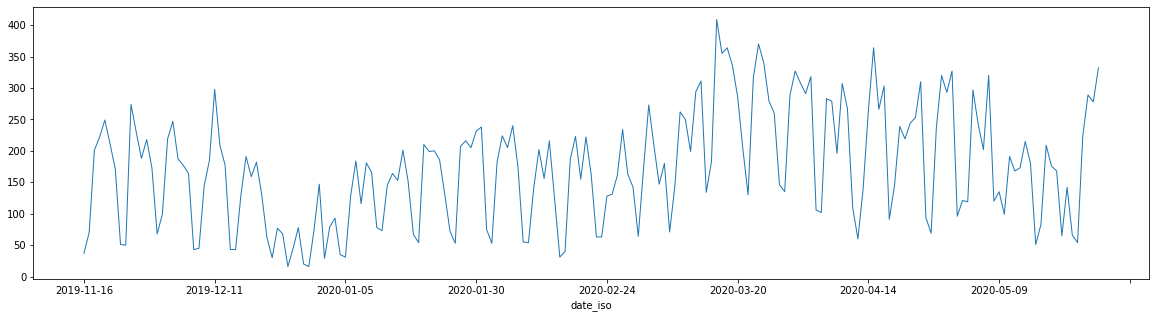

In [28]:
tweets_france_day['total_fr'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

2020-03-17 : Début du confinement en France ---> pic de la courbe

2020-03-23 : Le soir, le Premier ministre Édouard Philippe annonce la fermeture des marchés de plein air, sauf dérogations accordées par les préfets79. Les sorties sportives ou « pour promener ses enfants » sont dorénavant limitées à un rayon de 1 km et à une heure maximum par jour. Les sorties médicales ne sont plus autorisées que sur convocation d'un médecin ou pour des urgences  ---> 2ème pic de la courbe

2020-04-30 : La barre des 3 000 morts à l'hôpital est dépassée82. Le même jour, 8,5 millions de masques arrivent en France par avion. Ils font partie d'une commande de 1,5 milliard de masques par le gouvernement, la production nationale de 8 millions d'unités ne pouvant suffire pour couvrir les besoins hebdomadaires évalués à 40 millions de pièces

### SWEDEN CASE

In [29]:
tweets_sweden = tweets[tweets.country == "Suède"]
tweets_corona_sweden = tweets_corona[tweets_corona.country == "Suède"]
tweets_corona_sweden.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
145067,1253636382104391680,@lenahallengren,Fri Apr 24 10:46:19 +0000 2020,2020-04-24,sv,sv,RT @socialdep: På grund av #covid19 har regeringen och @SKR_se beslutat om ett tillägg till överenskommelsen om kömiljarderna. Bland annat…,done,"Because of covid19, the government has decided on an addition to the agreement on the queue billions. Including…",0.4939,False,4,False,NaN,NaN,None,False,0,NaN,[2020-04-29 18:02:03],Suède,gouvernement_decideurs,person,sante,"[covid19, government, decide, addition, agreement, queue, billion, include]",16


In [30]:
print("Total Sweden tweets : " , len(tweets_sweden))
print("Total Sweden tweets about corona : " , len(tweets_corona_sweden))
print("Percentage tweets about corona: " , len(tweets_corona_sweden)/len(tweets_sweden))

Total Sweden tweets :  30669
Total Sweden tweets about corona :  2540
Percentage tweets about corona:  0.08281978545110698


In [31]:
tweets_sweden_day = tweets_sweden.groupby('date_iso')[['id']].count()
tweets_sweden_day.columns=['total_swd']
tweets_sweden_day.head(2)

,total_swd
date_iso,
2019-11-16,43
2019-11-17,31


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

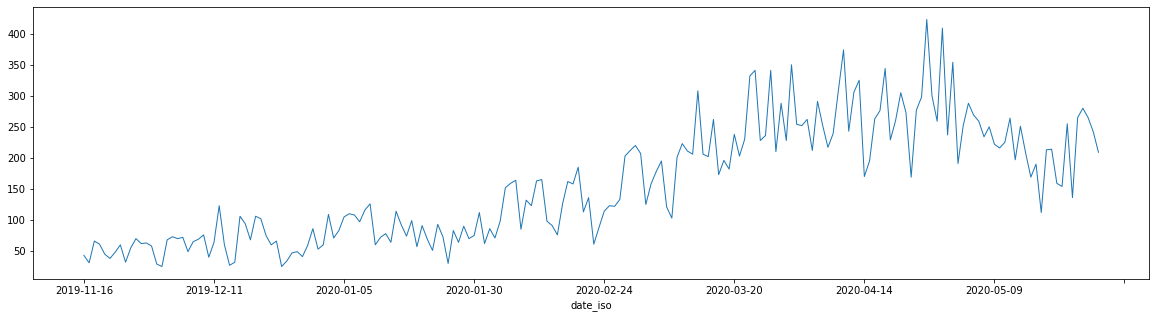

In [32]:
tweets_sweden_day['total_swd'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

### SPAIN case

In [33]:
tweets_Espagne = tweets[tweets.country == "Espagne"]
tweets_corona_Espagne = tweets_corona[tweets_corona.country == "Espagne"]
tweets_corona_Espagne.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
113075,1238008228576927746,@sanchezcastejon,Thu Mar 12 07:45:37 +0000 2020,2020-03-12,es,es,"Hoy se reúne el #CMIN que aprobará medidas del Plan de Choque en respuesta al #COVID19. El Gobierno, en coordinación con las Comunidades Autónomas, hará lo que haga falta, cuando y donde haga falta. Juntos tenemos que #FrenarLaCurva https://t.co/8i3fIkcOLN",done,"Today the cmin meets to approve measures of the Shock Plan in response to the covid 19. The Government, in coordination with the Autonomous Communities, will do what is necessary, when and where it is necessary. Together we have to stop the curve",-0.5859,False,628,True,1.237985e+18,NaN,None,False,1809,False,[2020-04-29 16:43:49],Espagne,gouvernement_decideurs,person,autres,"[today, min, meet, approve, measure, shock, plan, response, covid, 1st, government, coordination, autonomous, community, necessary, necessary, stop, curve]",12


In [34]:
print("Total Spain tweets : " , len(tweets_Espagne))
print("Total Spain tweets about corona : " , len(tweets_corona_Espagne))
print("Percentage tweets about corona: " , len(tweets_corona_Espagne)/len(tweets_Espagne))

Total Spain tweets :  28312
Total Spain tweets about corona :  5612
Percentage tweets about corona:  0.198219836111896


In [35]:
tweets_spain_day = tweets_Espagne.groupby('date_iso')[['id']].count()
tweets_spain_day.columns=['total_spain']
tweets_spain_day.head(2)

,total_spain
date_iso,
2019-11-16,38
2019-11-17,36


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

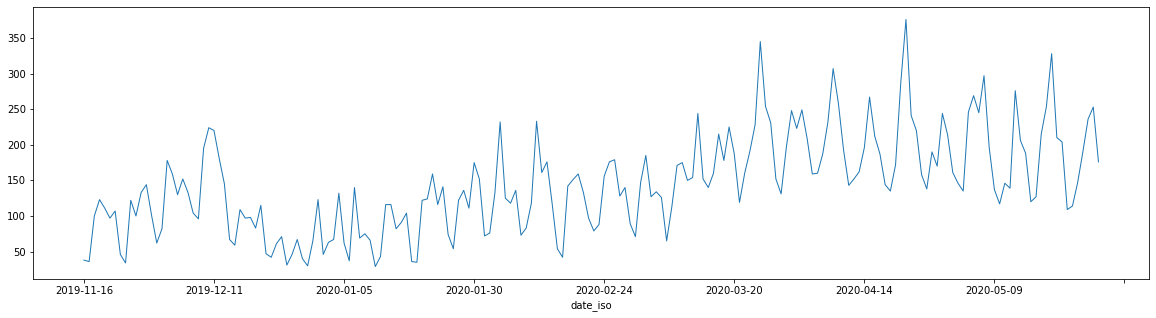

In [36]:
tweets_spain_day['total_spain'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

2020-03-13 : Le gouvernement espagnol annonce le 13 mars que l'état d'alerte ---> 1er pic de la courbe
2020-03-14 : Début du confinement en Spain 

2020-03-25 :  ---> 2ème pic de la courbe
Le 25 mars, un groupe de « jeunes » de La Línea de la Concepción, au sud de l'Espagne, jette des pierres bloque des ambulances transportant 28 personnes âgées atteintes du coronavirus vers une résidence où elles devaient être prises en charge. La ville est une plaque tournante du trafic de drogue et de cigarettes et le confinement perturbe ce trafic illégal.

2020-04-07 :  ---> 3ème pic de la courbe
Le 9 avril 2020, Pedro Sánchez annonce la levée de l'interdiction du travail non-essentiel pour la semaine suivante, tandis que l'état d'alerte reste prolongé jusqu'au 26 avril.

### BRAZIL CASE

In [37]:
tweets_brazil = tweets[tweets.country == "Brésil"]
tweets_corona_brazil = tweets_corona[tweets_corona.country == "Brésil"]
tweets_corona_brazil.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
85839,1255103572234194945,@jairbolsonaro,Tue Apr 28 11:56:24 +0000 2020,2020-04-28,pt,pt,"1- O @minsaude @TeichNelson encerra o mês com a entrega de 272 novos respiradores ao Sistema Único de Saúde. Produzidos no Brasil, os equipamentos ajudam no enfrentamento da Covid-19. Saiba mais: https://t.co/KrJYIg7lBc",done,"1- The month ends with the delivery of 272 new respirators to the Unified Health System. Produced in Brazil, the equipment helps to face Covid-19. Know more:",0.6369,False,6136,False,NaN,NaN,None,False,35842,False,[2020-04-29 16:16:48],Brésil,gouvernement_decideurs,person,autres,"[month, end, delivery, 2nd, new, respirator, unified, health, system, produce, brazil, equipment, help, face]",17


In [38]:
print("Total Brazil tweets : " , len(tweets_brazil))
print("Total Brazil tweets about corona : " , len(tweets_corona_brazil))
print("Percentage tweets about corona: " , len(tweets_corona_brazil)/len(tweets_brazil))

Total Brazil tweets :  23612
Total Brazil tweets about corona :  5197
Percentage tweets about corona:  0.22009994917838388


In [39]:
tweets_brazil_day = tweets_brazil.groupby('date_iso')[['id']].count()
tweets_brazil_day.columns=['total_brazil']
tweets_brazil_day.head(2)

,total_brazil
date_iso,
2019-11-16,22
2019-11-17,28


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

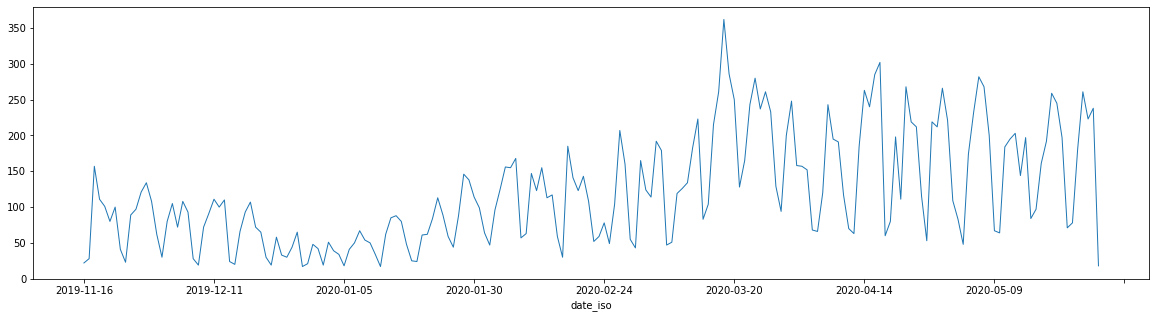

In [40]:
tweets_brazil_day['total_brazil'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

### UK CASE

In [41]:
tweets_uk = tweets[tweets.country == "Royaume-Uni"]
tweets_corona_uk = tweets_corona[tweets_corona.country == "Royaume-Uni"]
tweets_corona_uk.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
52750,1246452870062444550,@BorisJohnson,Sat Apr 04 15:01:36 +0000 2020,2020-04-04,en,,"RT @10DowningStreet: WATCH LIVE: #coronavirus press conference (4 April 2020) Speakers: 🔵 @michaelgove, Chancellor of the Duchy of Lancast…",eng_or_undef,"WATCH LIVE: coronavirus press conference (4 April 2020) Speakers: 🔵 , Chancellor of the Duchy of Lancast…",0.0,False,374,False,NaN,NaN,None,False,0,NaN,[2020-04-29 15:30:00],Royaume-Uni,gouvernement_decideurs,person,autres,"[watch, live, coronavirus, press, conference, april, speaker, chancellor, duchy, lancaster]",14


In [42]:
print("Total UK tweets : " , len(tweets_uk))
print("Total UK tweets about corona : " , len(tweets_corona_uk))
print("Percentage tweets about corona: " , len(tweets_corona_uk)/len(tweets_uk))

Total UK tweets :  21777
Total UK tweets about corona :  5215
Percentage tweets about corona:  0.23947283831565414


In [43]:
tweets_uk_day = tweets_uk.groupby('date_iso')[['id']].count()
tweets_uk_day.columns=['total_uk']
tweets_uk_day.head(2)

,total_uk
date_iso,
2019-11-16,58
2019-11-17,72


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

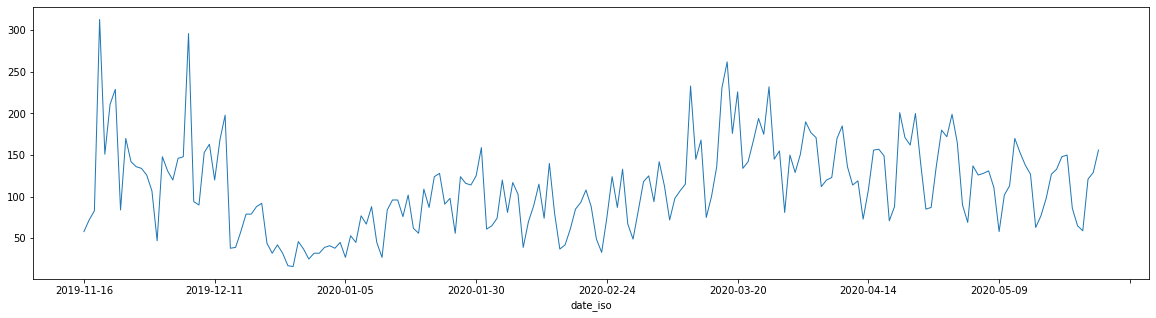

In [44]:
tweets_uk_day['total_uk'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

### ITALY case

In [45]:
tweets_italy = tweets[tweets.country == "Italie"]
tweets_corona_italy = tweets_corona[tweets_corona.country == "Italie"]
tweets_corona_italy.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
60819,1249019093048492034,@Quirinale,Sat Apr 11 16:58:52 +0000 2020,2020-04-11,it,it,"#coronavirus, il videomessaggio del Presidente #Mattarella per la #Pasqua https://t.co/c1hXaPalLr",done,"coronavirus, the video message of the President mattarella for easter",0.0,False,2660,False,NaN,NaN,None,False,9934,False,[2020-04-29 15:35:31],Italie,gouvernement_decideurs,institution,autres,"[coronavirus, video, message, president, mattarella, easter]",15


In [46]:
print("Total Italy tweets : " , len(tweets_italy))
print("Total Italy tweets about corona : " , len(tweets_corona_italy))
print("Percentage tweets about corona: " , len(tweets_corona_italy)/len(tweets_italy))

Total Italy tweets :  20530
Total Italy tweets about corona :  4424
Percentage tweets about corona:  0.2154895275207014


In [47]:
tweets_italy_day = tweets_italy.groupby('date_iso')[['id']].count()
tweets_italy_day.columns=['total_italy']
tweets_italy_day.head(2)

,total_italy
date_iso,
2019-11-16,64
2019-11-17,42


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

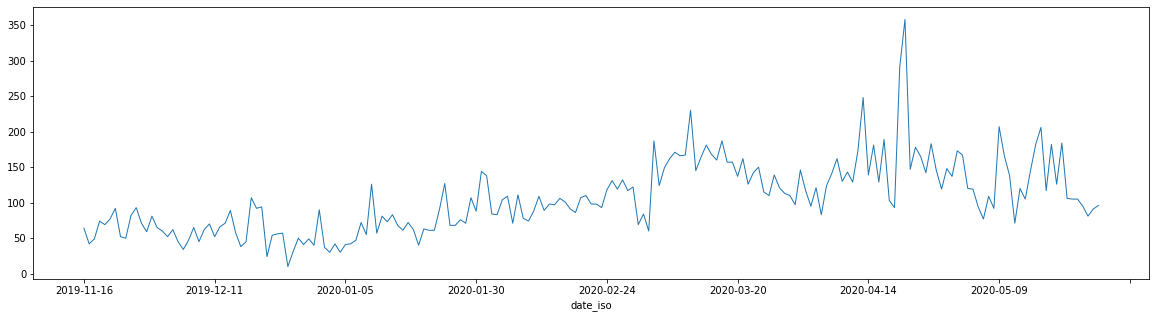

In [48]:
tweets_italy_day['total_italy'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

2020-03-10 : Début du confinement en Italie ---> le pic de la courbe est après un jour

### CANADA case

In [49]:
tweets_Canada = tweets[tweets.country == "Canada"]
tweets_corona_Canada = tweets_corona[tweets_corona.country == "Canada"]
tweets_corona_Canada.head(1)

,id,screen_name,created_at,date_iso,lang,detected_language_code,full_text,to_translate,full_text_translated,vader_compound,retweeted,retweet_count,is_quote_status,quoted_status_id,in_reply_to_status_id,in_reply_to_screen_name,favorited,favorite_count,possibly_sensitive,scraped_date,country,type,person_institution,domain,clean_text,week_nb
70650,1255287918937194496,@JustinTrudeau,Wed Apr 29 00:08:56 +0000 2020,2020-04-29,en,,"Spoke with Premier @fordnation again today. We talked about what we're doing to keep Ontarians safe and supported right now, as well as the work we'll need to do with governments across the country to defeat COVID-19 and gradually reopen the economy. https://t.co/Noj6JvtAJP",eng_or_undef,"Spoke with Premier again today. We talked about what we're doing to keep Ontarians safe and supported right now, as well as the work we'll need to do with governments across the country to defeat COVID-19 and gradually reopen the economy.",0.5106,False,65,False,NaN,NaN,None,False,459,False,[2020-04-29 16:04:10],Canada,gouvernement_decideurs,person,autres,"[speak, premier, today, talk, ontarian, safe, support, right, work, government, country, defeat, covid-19, gradually, reopen, economy]",17


In [50]:
print("Total Canada tweets : " , len(tweets_Canada))
print("Total Canada tweets about corona : " , len(tweets_corona_Canada))
print("Percentage tweets about corona: " , len(tweets_corona_Canada)/len(tweets_Canada))

Total Canada tweets :  19221
Total Canada tweets about corona :  6661
Percentage tweets about corona:  0.34654804640757503


In [51]:
tweets_Canada_day = tweets_Canada.groupby('date_iso')[['id']].count()
tweets_Canada_day.columns=['total_canada']
tweets_Canada_day.head(2)

,total_canada
date_iso,
2019-11-16,18
2019-11-17,15


/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

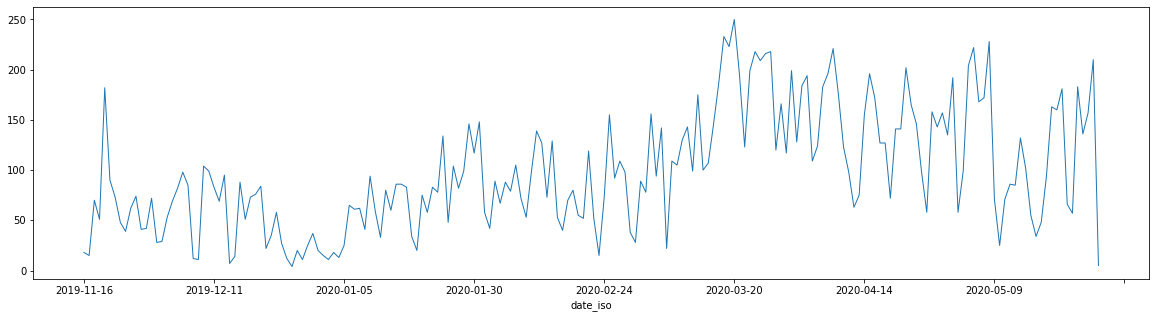

In [52]:
tweets_Canada_day['total_canada'].plot.line(x='date_iso', y='total', figsize=(20,5), lw=1)

2020-03-13 :  début confinement ---> le pic de la courbe
L'urgence sanitaire est déclarée le 13 mars 2020 par le gouvernement du Québec.

## Comparing USA & INDIA

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

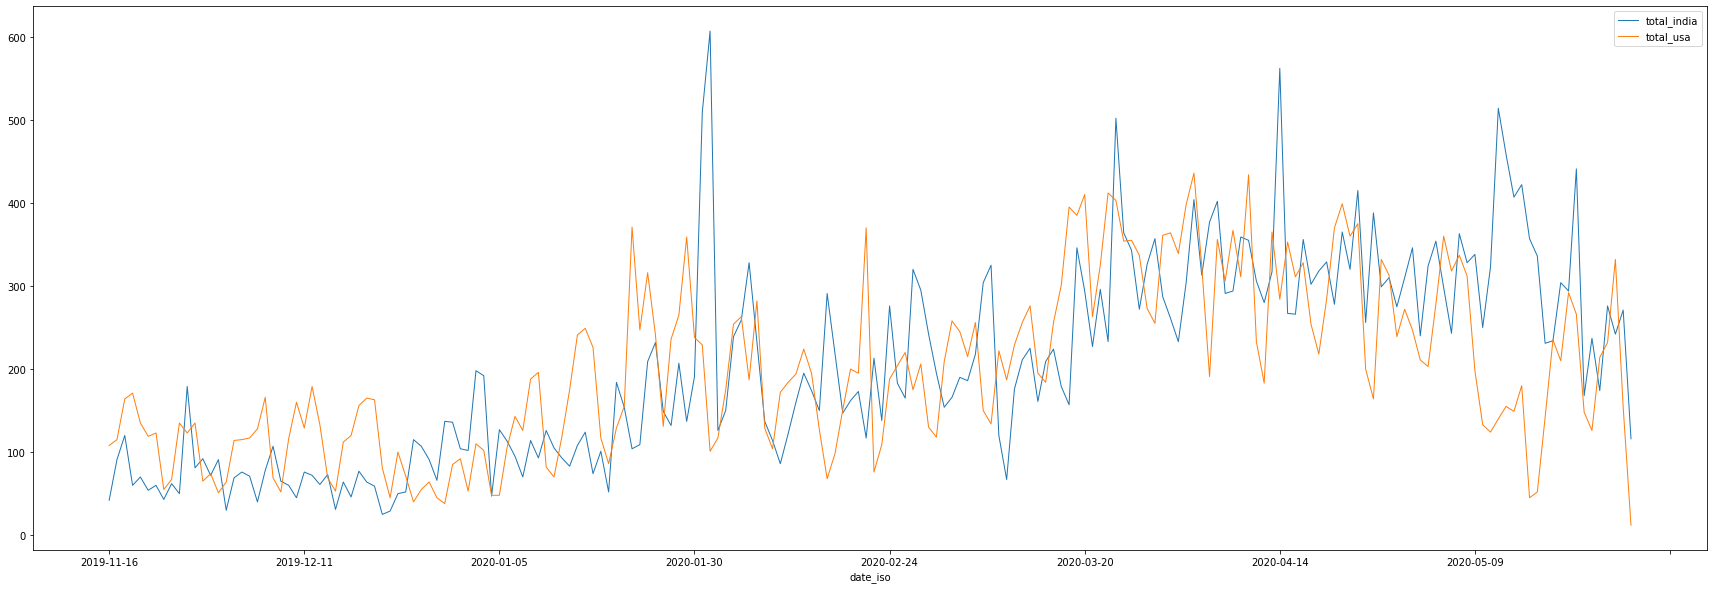

In [54]:
df_total_india_usa = pd.merge(tweets_India_day, tweets_usa_day, left_index=True, right_index=True)
df_total_india_usa.plot.line(figsize=(30,10), lw=1)

## Comparing GERMANY & FRANCE

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

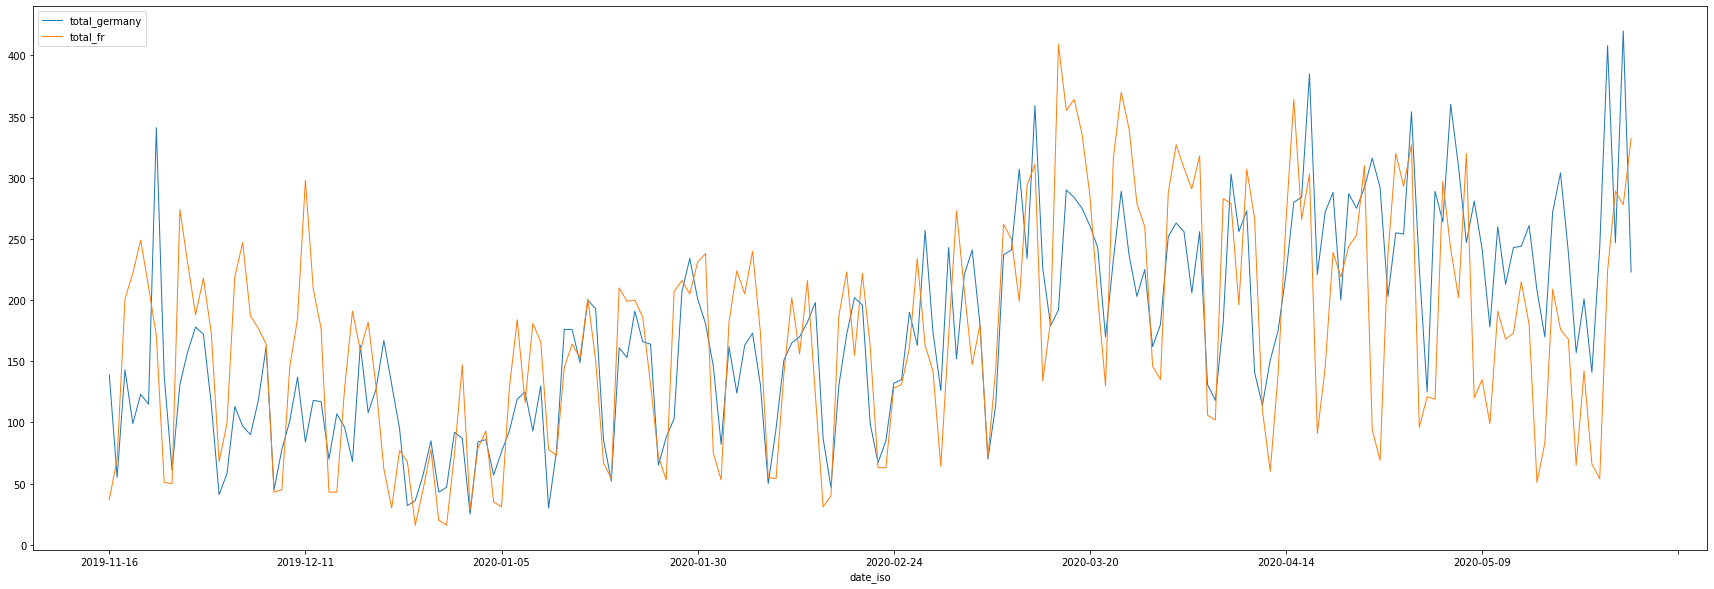

In [55]:
df_total_ger_fr = pd.merge(tweets_Allemagne_day, tweets_france_day, left_index=True, right_index=True)
df_total_ger_fr.plot.line(figsize=(30,10), lw=1)

## Comparing INDIA, USA, GERMANY, FRANCE & SWEDEN

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

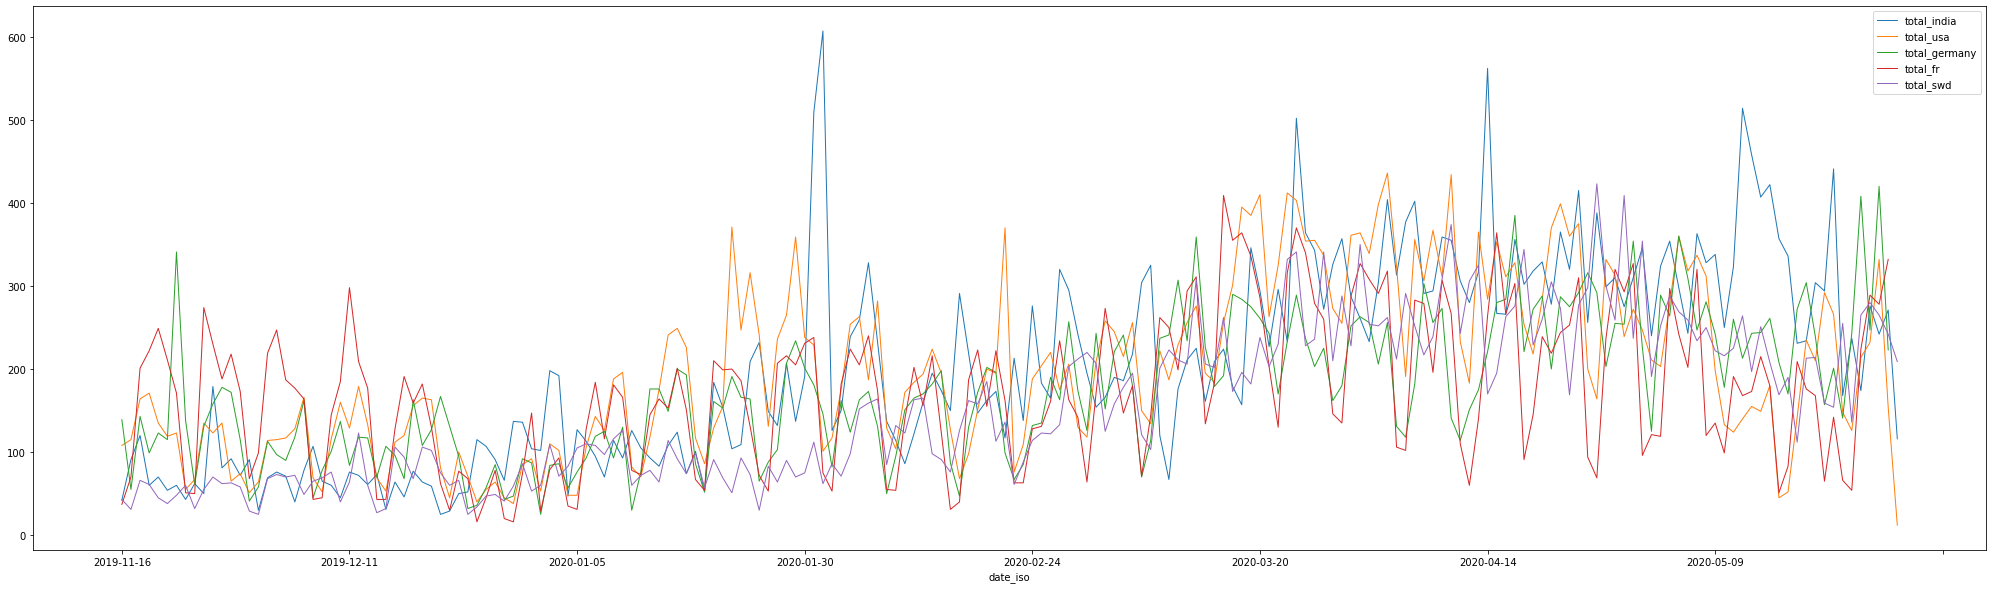

In [56]:
data_frames1 = [tweets_India_day, tweets_usa_day, tweets_Allemagne_day, tweets_france_day, tweets_sweden_day]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frames1)


df_merged.plot.line(figsize=(35,10), lw=1)

## Comparing SPAIN, BRAZIL, UK, ITALY & CANADA

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date_iso'>

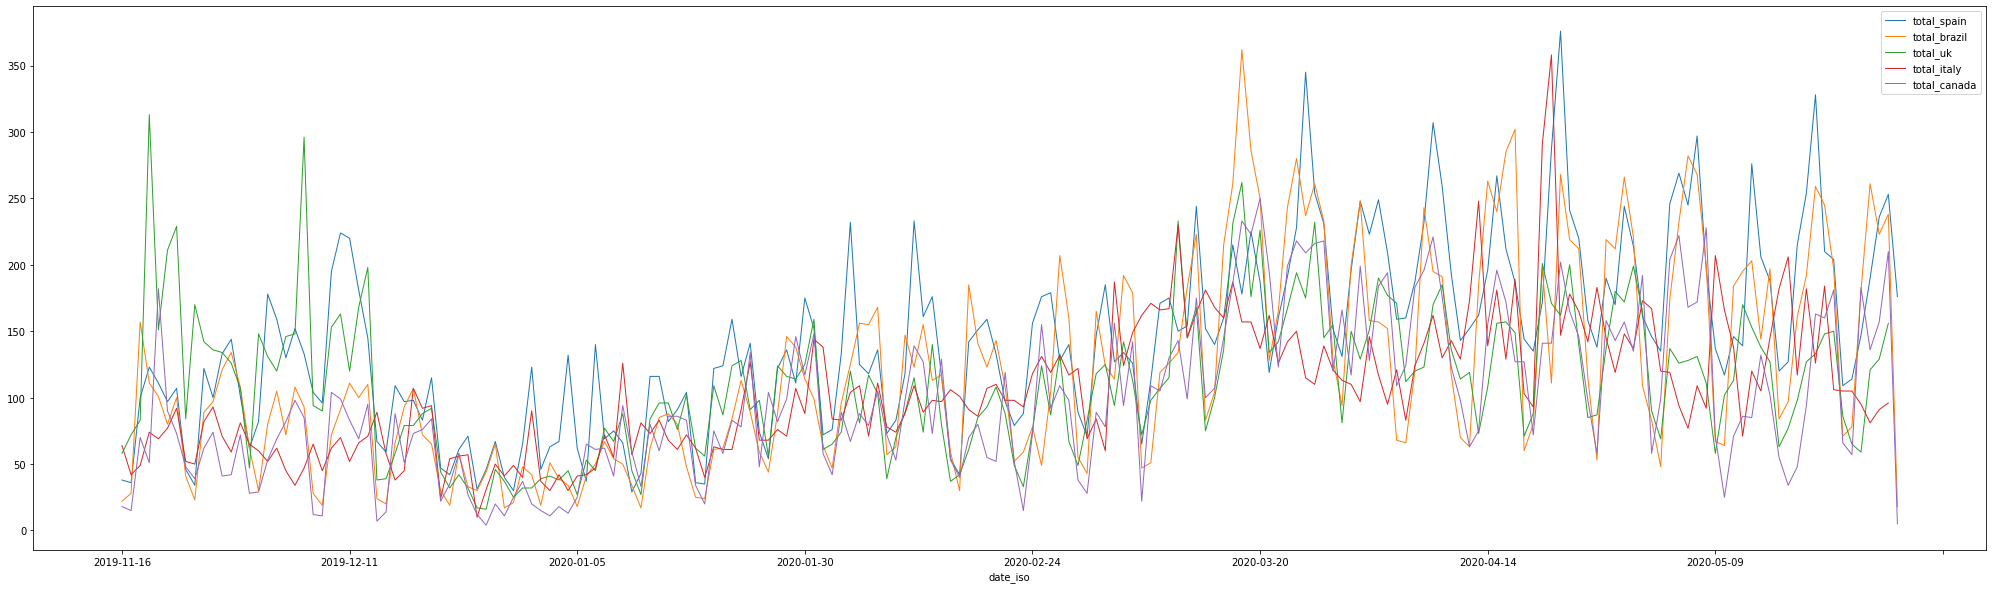

In [57]:
data_frames2 = [tweets_spain_day, tweets_brazil_day, tweets_uk_day, tweets_italy_day, tweets_Canada_day]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date_iso'],
                                            how='outer'), data_frames2)


df_merged.plot.line(figsize=(35,10), lw=1)